<h1 style="color:#2192f1" align="center"> LINEAR REGRESSION</h1>


<h2 align="center" style="color:#f0e912">IMPORT LIBRARIES</h2>

In [1]:
import pandas as pd
from LinearRegression.src.regression import *
from LinearRegression.src.visualization import plot_weights_trajectory, plot_loss_trajectory, plot_h_function, plot_data

<h2 align="center" style="color:#f0e912">DATA EXPLORATION</h2>


In [2]:
df_train = pd.read_csv("data/randomly_generated/train.csv")
df_test = pd.read_csv("data/randomly_generated/test.csv")

In [3]:
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
df_train["y"].isnull().sum()
# Drop the rows where at least one element is missing
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)

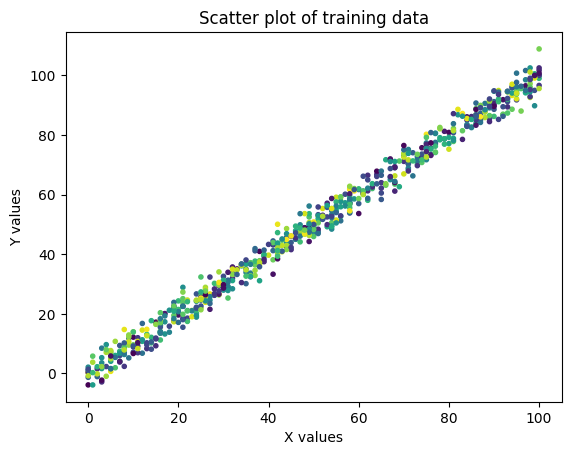

In [5]:
plot_data(df_train["x"], df_train["y"])

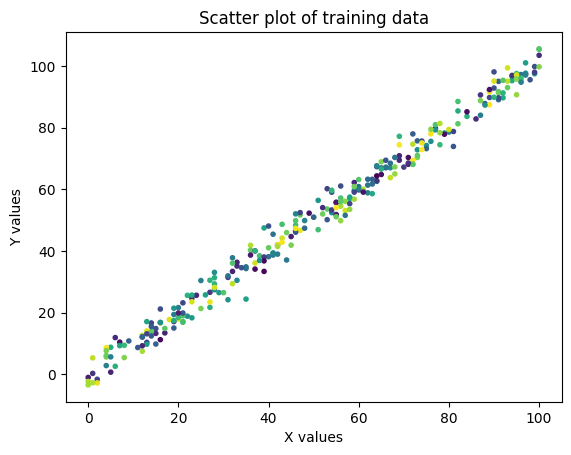

In [19]:
plot_data(df_test["x"], df_test["y"])

In [6]:
# Transform features and target into numpy
X = df_train["x"].values.reshape(-1, 1)
y = df_train["y"].values.reshape(-1, 1)
# Intercept feature
i_term = np.ones((len(X), 1))
# Add intercept feature in other features
X_intercept = np.concatenate((i_term, X), axis=1)

<h2 align="center" style="color:#f0e912">TRAINING AND VISUALIZATION</h2>


In [7]:
w, final_loss, weights_history, loss_history = gradient_descent(X_intercept, y, type="BGD")

Convergence achieved!
Final weights : 
θ₀ = 0.014900157842746719
θ₁ = 0.9981606189503998
Final loss : 3.9364871868853086


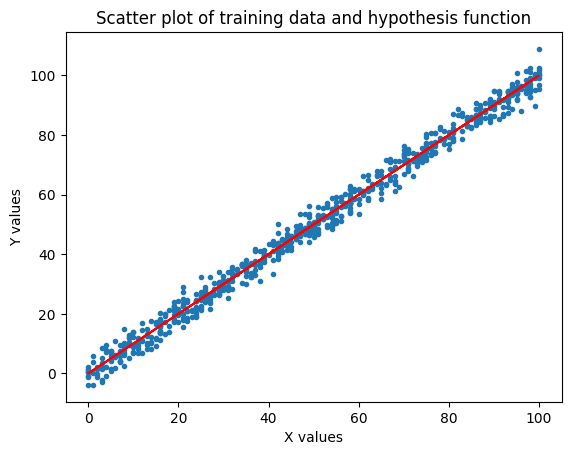

In [23]:
plot_h_function(X, y, X_intercept, w)

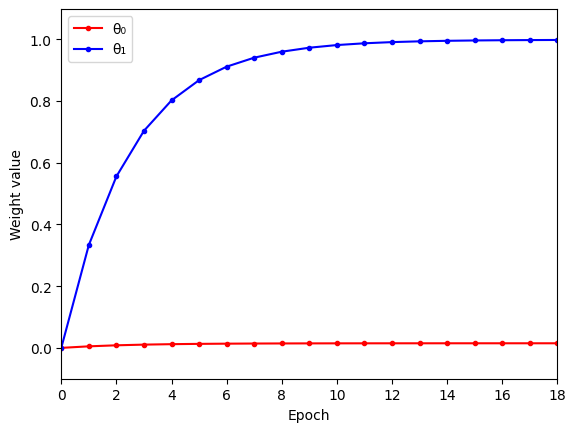

In [24]:
plot_weights_trajectory(weights_history)

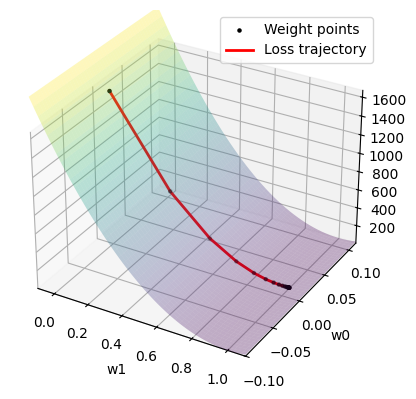

In [25]:
plot_loss_trajectory(weights_history, loss_history, X_intercept, y)

<h2 align="center" style="color:#f0e912">TESTING AND VISUALIZATION</h2>


In [20]:
# Transform features and target into numpy
X_test = df_test["x"].values.reshape(-1, 1)
y_test = df_test["y"].values.reshape(-1, 1)
# Intercept feature
i_term = np.ones((len(X_test), 1))
# Add intercept feature in other features
X_test_intercept = np.concatenate((i_term, X_test), axis=1)

In [21]:
cost_function(X_test_intercept, y_test, w)

np.float64(4.748338543290315)

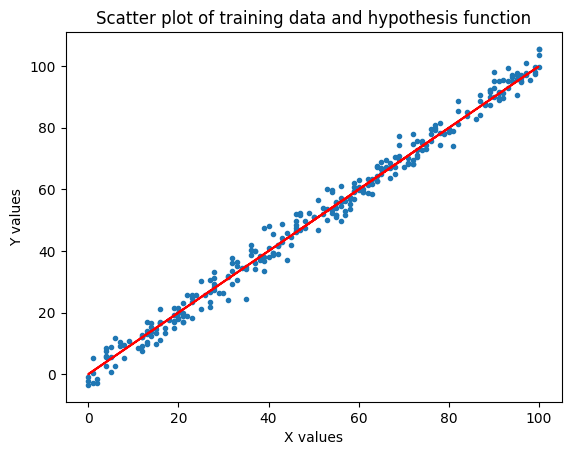

In [26]:
plot_h_function(df_test["x"], df_test["y"], X_test_intercept, w)